### Microexon analysis

In [1]:
!pwd

/ibex/scratch/projects/c2102/fkl_kelly/FKL/notebook


## Analizing all microexons in CCDS

### Filtering the CCDS exon to protein file by sequence length to get only microexons!

In [2]:
from Bio import SeqIO

short_sequences = []  # Setup an empty list
for record in SeqIO.parse("../micex_data/CCDS_protein_exons.current.faa", "fasta"):
    if len(record.seq) <= 17:
        # Add this record to our list
        short_sequences.append(record)

print("Found %i short sequences" % len(short_sequences))

SeqIO.write(short_sequences, "51microexons_CCDS_seqs.fasta", "fasta")

Found 28835 short sequences


28835

In [4]:
##Converting the multifasta in single fasta
import argparse 

f_open = open('../micex_data/51microexons_CCDS_seqs.fasta', "r")


for rec in SeqIO.parse(f_open, "fasta"):
   id = rec.id
   seq = rec.seq
   id_file = open(id, "w")
   id_file.write(">"+str(id)+"\n"+str(seq))
   id_file.close()

f_open.close()

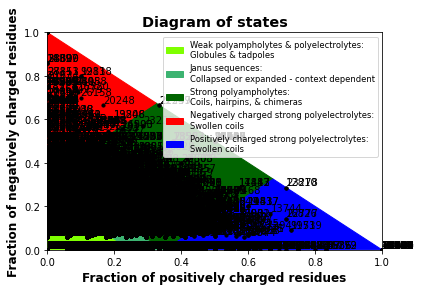

In [1]:
# import a few things...
import os
import localcider
from localcider.sequenceParameters import SequenceParameters
# import the plots module
from localcider import plots

# filelist is now a list of each file in the current directory - all
#filelist = os.listdir("../micex_data/micex_proteins/")

# filelist is now a list of each file in the current directory - all micex seq from CCDS
filelist = os.listdir("../micex_data/51micex_ccds_proteins/")

# filelist is now a list of each file in the current directory - top100
#filelist = os.listdir("../maxat_data/top100")


# create an empty list 
list_of_SeqObjs = []

# populate that list with SequenceParameters objects, which we construct from the
# sequence found in each file
for file in filelist:
    try:
      list_of_SeqObjs.append(SequenceParameters(sequenceFile='../micex_data/51micex_ccds_proteins/'+str(file)))
    except localcider.SequenceFileParserException:
      # if we encounter a file parsing error just skip that sequence
      continue
   #list_of_SeqObjs.append(SequenceParameters(sequenceFile='../micex_data/micex_proteins/'+str(file)))
   #list_of_SeqObjs.append(SequenceParameters(sequenceFile='../maxat_data/top100/'+str(file)))

#kappa = []
# for each 
#for obj in list_of_SeqObjs:
    #kappa.append(obj.get_kappa())
    
#make labels for the plot!
labels=[str(x) for x in range(1,len(list_of_SeqObjs) + 1)]

# showing with sequence labels
plots.show_multiple_phasePlot2(list_of_SeqObjs, label_list=labels, title='Diagram of states', legendOn=True, xLim=1, yLim=1, fontSize=10, getFig=False)


In [2]:
properties = [(
    obj.get_length(),
    obj.get_FCR(),
    obj.get_NCPR(),
    obj.get_isoelectric_point(),
    obj.get_molecular_weight(),
    obj.get_fraction_negative(),
    obj.get_fraction_positive(),
    obj.get_fraction_expanding(),
    obj.get_fraction_disorder_promoting(),
    obj.get_kappa(),
    obj.get_mean_net_charge(),
    obj.get_phasePlotRegion(),
    obj.get_mean_hydropathy(),
    obj.get_uversky_hydropathy(),
    obj.get_delta(),
    obj.get_deltaMax()
) for obj in list_of_SeqObjs]

In [3]:
length, FCR, NCPR, IP, MW, Fn, Fp, Fex, Fd, K, NC, PPR, MH, UH, D, Dmax = zip(*properties)

In [4]:
[len(l) for l in [length, FCR, NCPR, IP, MW, Fn, Fp, Fex, Fd, K, NC, PPR, MH, UH, D, Dmax]]

[28832,
 28832,
 28832,
 28832,
 28832,
 28832,
 28832,
 28832,
 28832,
 28832,
 28832,
 28832,
 28832,
 28832,
 28832,
 28832]

In [5]:
import pandas as pd
from Bio import SeqIO
import pandas as pd
import os

In [7]:
prop51_df = pd.DataFrame({
    'length': length,
    'fraction_charged': FCR,
    'net_charge_per_residue': NCPR,
    'IP': IP,
    'MW': MW,
    'f-': Fn,
    'f+': Fp,
    'fracc_expanding': Fex,
    'fracc_disorder_promoting': Fd,
    'kappa': K,
    'mean_NC': NC,
    'phase_region': PPR,
    'mean_hydropathy': MH,
    'uversky_hydropathy': UH,
    'delta': D,
    'delta_max': Dmax
})

In [8]:
prop51_df.to_pickle('../micex_data/51micex_ccds_properties.pkl')

In [9]:
prop51_df = pd.read_pickle('../micex_data/51micex_ccds_properties.pkl')

In [10]:
prop51_df

,length,fraction_charged,net_charge_per_residue,IP,MW,f-,f+,fracc_expanding,fracc_disorder_promoting,kappa,mean_NC,phase_region,mean_hydropathy,uversky_hydropathy,delta,delta_max
0,17,0.176471,-0.058824,4.101562,1975.5,0.117647,0.058824,0.176471,0.647059,0.155847,0.058824,1,4.529412,0.503268,0.009018,0.057865
1,16,0.125000,0.000000,7.000000,1619.9,0.062500,0.062500,0.250000,0.687500,0.191736,0.000000,1,4.400000,0.488889,0.005859,0.030556
2,12,0.250000,-0.083333,5.250000,1332.7,0.166667,0.083333,0.250000,0.666667,0.051363,0.083333,2,4.225000,0.469444,0.003946,0.076830
3,8,0.500000,-0.250000,3.828125,972.0,0.375000,0.125000,0.500000,0.500000,0.595868,0.250000,3,4.762500,0.529167,0.078773,0.132199
4,2,0.000000,0.000000,7.000000,218.2,0.000000,0.000000,0.000000,0.500000,-1.000000,0.000000,1,6.250000,0.694444,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28827,10,0.300000,-0.100000,4.046875,1284.5,0.200000,0.100000,0.300000,0.400000,0.064935,0.100000,2,4.240000,0.471111,0.005556,0.085556
28828,10,0.400000,0.000000,7.000000,1179.4,0.200000,0.200000,0.400000,0.600000,0.123522,0.000000,3,4.440000,0.493333,0.012901,0.104444
28829,17,0.294118,0.058824,10.062500,1922.4,0.117647,0.176471,0.294118,0.588235,0.322716,0.058824,2,3.576471,0.397386,0.048425,0.150055
28830,14,0.357143,0.214286,11.375000,1609.2,0.071429,0.285714,0.357143,0.714286,0.155630,0.214286,3,3.742857,0.415873,0.022646,0.145509


In [11]:
prop30_df = pd.read_pickle('../micex_data/30micex_ccds_properties.pkl')

In [12]:
prop30_df

,length,fraction_charged,net_charge_per_residue,IP,MW,f-,f+,fracc_expanding,fracc_disorder_promoting,kappa,mean_NC,phase_region,mean_hydropathy,uversky_hydropathy,delta,delta_max
0,9,0.000000,0.000000,7.000000,823.1,0.000000,0.00,0.333333,0.888889,-1.000000,0.000000,1,3.788889,0.420988,0.000000,0.000000
1,8,0.375000,0.125000,9.734375,1009.2,0.125000,0.25,0.375000,0.500000,0.014107,0.125000,3,2.437500,0.270833,0.001083,0.076757
2,5,0.200000,0.200000,12.250000,648.0,0.000000,0.20,0.200000,0.400000,-1.000000,0.200000,1,5.240000,0.582222,0.000000,0.000000
3,4,0.500000,0.000000,7.000000,547.7,0.250000,0.25,0.500000,0.500000,-1.000000,0.000000,3,3.925000,0.436111,0.000000,0.000000
4,4,0.000000,0.000000,3.500000,346.5,0.000000,0.00,0.250000,0.750000,-1.000000,0.000000,1,5.075000,0.563889,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,4,0.000000,0.000000,10.500000,532.7,0.000000,0.00,0.000000,0.250000,-1.000000,0.000000,1,5.925000,0.658333,0.000000,0.000000
9116,1,0.000000,0.000000,7.000000,149.2,0.000000,0.00,0.000000,0.000000,-1.000000,0.000000,1,6.400000,0.711111,0.000000,0.000000
9117,5,0.400000,0.400000,13.890625,567.7,0.000000,0.40,0.800000,1.000000,-1.000000,0.400000,5,2.540000,0.282222,0.000000,0.000000
9118,9,0.111111,-0.111111,1.750000,1082.3,0.111111,0.00,0.111111,0.555556,0.511347,0.111111,1,4.155556,0.461728,0.005494,0.010744


In [4]:
import pandas as pd

prop_diso_df = pd.read_pickle('../micex_data/micex_properties_diso.pkl')
prop_diso_df

,length,fraction_charged,net_charge_per_residue,IP,MW,f-,f+,fracc_expanding,fracc_disorder_promoting,kappa,mean_NC,phase_region,mean_hydropathy,uversky_hydropathy,delta,delta_max
0,6,0.333333,-0.333333,1.75000,738.8,0.333333,0.000000,0.500000,0.666667,1.000000,0.333333,2,3.733333,0.414815,0.005556,0.005556
1,5,0.000000,0.000000,7.00000,474.7,0.000000,0.000000,0.000000,0.800000,-1.000000,0.000000,1,4.820000,0.535556,0.000000,0.000000
2,9,0.333333,-0.333333,3.71875,999.1,0.333333,0.000000,0.333333,0.888889,0.317603,0.333333,2,3.377778,0.375309,0.016639,0.052389
3,9,0.222222,0.222222,12.25000,961.4,0.000000,0.222222,0.222222,0.777778,0.451887,0.222222,1,4.100000,0.455556,0.014596,0.032299
4,8,0.250000,0.000000,7.00000,813.9,0.125000,0.125000,0.500000,0.875000,0.329114,0.000000,2,3.475000,0.386111,0.009630,0.029259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,5,0.000000,0.000000,7.00000,502.7,0.000000,0.000000,0.000000,0.600000,-1.000000,0.000000,1,5.160000,0.573333,0.000000,0.000000
447,8,0.250000,0.000000,7.00000,965.3,0.125000,0.125000,0.250000,0.625000,1.000000,0.000000,2,4.062500,0.451389,0.029259,0.029259
448,7,0.428571,-0.428571,1.75000,733.8,0.428571,0.000000,0.571429,0.857143,0.722204,0.428571,4,2.928571,0.325397,0.012483,0.017285
449,4,0.000000,0.000000,7.00000,290.4,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,1,4.550000,0.505556,0.000000,0.000000


In [5]:
prop_disprot_df = pd.read_pickle('../micex_data/disprot_human_features.pkl')
prop_disprot_df

,acc,name,organism,ncbi_taxon_id,disprot_id,region_id,start,end,term_namespace,term,ec,reference,region_sequence,confidence,obsolete
2,P49913,Cathelicidin antimicrobial peptide,Homo sapiens,9606,DP00004,DP00004r001,134,170,Structural state,IDPO:IDPO:00076,ECO:ECO:0006180,pmid:9452503,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES,NaN,NaN
3,P49913,Cathelicidin antimicrobial peptide,Homo sapiens,9606,DP00004,DP00004r002,134,170,Structural transition,IDPO:IDPO:00050,ECO:ECO:0006180,pmid:9452503,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES,NaN,NaN
4,P49913,Cathelicidin antimicrobial peptide,Homo sapiens,9606,DP00004,DP00004r004,134,170,Disorder function,IDPO:IDPO:00510,ECO:ECO:0005612,pmid:9452503,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES,NaN,NaN
32,P27695,DNA-(apurinic or apyrimidinic site) lyase,Homo sapiens,9606,DP00007,DP00007r002,1,42,Structural state,IDPO:IDPO:00076,ECO:ECO:0006187,pmid:11286553,MPKRGKKGAVAEDGDELRTEPEAKKSKTAAKKNDKEAAGEGP,NaN,NaN
33,P27695,DNA-(apurinic or apyrimidinic site) lyase,Homo sapiens,9606,DP00007,DP00007r006,1,36,Structural state,IDPO:IDPO:00076,ECO:ECO:0001547,pmid:9603956,MPKRGKKGAVAEDGDELRTEPEAKKSKTAAKKNDKE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,Q92743,Serine protease HTRA1,Homo sapiens,9606,DP03358,DP03358r001,94,106,Structural state,IDPO:IDPO:00076,ECO:ECO:0006187,pmid:22578544,GVPASATVRRRAQ,NaN,NaN
8996,Q92743,Serine protease HTRA1,Homo sapiens,9606,DP03358,DP03358r002,301,313,Structural state,IDPO:IDPO:00076,ECO:ECO:0006187,pmid:21297635,QRGGKELGLRNSD,NaN,NaN
8997,Q92743,Serine protease HTRA1,Homo sapiens,9606,DP03358,DP03358r003,301,313,Structural transition,IDPO:IDPO:00050,ECO:ECO:0001823,pmid:21297635,QRGGKELGLRNSD,NaN,NaN
8998,Q92743,Serine protease HTRA1,Homo sapiens,9606,DP03358,DP03358r004,301,313,Disorder function,IDPO:IDPO:00511,ECO:ECO:0001823,pmid:21297635,QRGGKELGLRNSD,NaN,NaN
